In [1]:
import pandas as pd

data = pd.read_csv('../one_hot_encoded_data.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [2]:
# convert one-hot encoded features to float type

for i in list(data.columns):
    if data[i].dtype == 'int64':
        data[i] = data[i].astype('float')

In [3]:
data.groupby('loan_status').size()

loan_status
Charged Off              591
Current               117603
Default                    2
Fully Paid              7472
In Grace Period          747
Late (16-30 days)        276
Late (31-120 days)      1503
dtype: int64

In [4]:
data_target = data['loan_status']
data.drop('loan_status',inplace=True, axis=1)
data_input = data

In [5]:
from sklearn.preprocessing import StandardScaler 

ss = StandardScaler()
std_X = ss.fit_transform(data_input)

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict

In [8]:
# use best combination of parameters

pca = PCA(n_components=8)
x_pca = pca.fit_transform(std_X)

clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.2)
clf2 = LinearDiscriminantAnalysis(solver='svd', tol=0.03)

In [9]:
pred1 = cross_val_predict(clf1, x_pca, data_target, cv=5)
pred2 = cross_val_predict(clf2, x_pca, data_target, cv=5)

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/covariance/empirical_covariance_.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/covariance/empirical_covariance_.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)),

In [10]:
pred1_proba = cross_val_predict(clf1, x_pca, data_target, cv=5, method='predict_proba')
pred2_proba = cross_val_predict(clf2, x_pca, data_target, cv=5, method='predict_proba')

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/covariance/empirical_covariance_.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/covariance/empirical_covariance_.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)),

In [13]:
pd_pred1 = pd.DataFrame(pred1)

In [16]:
pd_pred1.groupby(0).size()

0
Charged Off           936
Current            120529
Fully Paid           6719
In Grace Period        10
dtype: int64

In [18]:
pd_pred2 = pd.DataFrame(pred2)
pd_pred2.groupby(0).size()

0
Charged Off             1861
Current               119930
Fully Paid              6326
Late (31-120 days)        77
dtype: int64

In [79]:
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(y_true, y_pred, fig_name,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.savefig(fig_name)
    return ax

Confusion matrix, without normalization
[[   260    260      0     71      0      0      0]
 [    40 117468      0     85     10      0      0]
 [     0      2      0      0      0      0      0]
 [   620    294      0   6558      0      0      0]
 [     1    741      0      5      0      0      0]
 [     0    276      0      0      0      0      0]
 [    15   1488      0      0      0      0      0]]


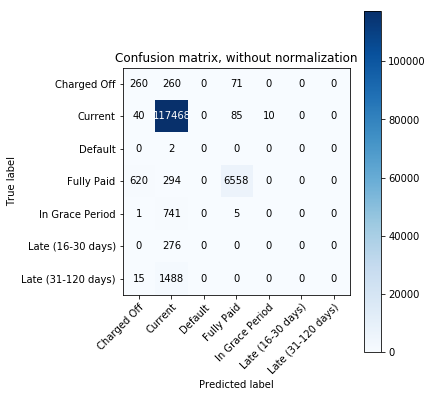

In [89]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix


plot_confusion_matrix(data_target, pred1, 
                      title='Confusion matrix, without normalization',fig_name='confusion matrix LDA_lsqr.png')

plt.show()

Confusion matrix, without normalization
[[   426     99      0     59      0      0      7]
 [   189 117330      0     52      0      0     32]
 [     0      2      0      0      0      0      0]
 [  1194     46      0   6213      0      0     19]
 [    12    732      0      2      0      0      1]
 [     5    269      0      0      0      0      2]
 [    35   1452      0      0      0      0     16]]


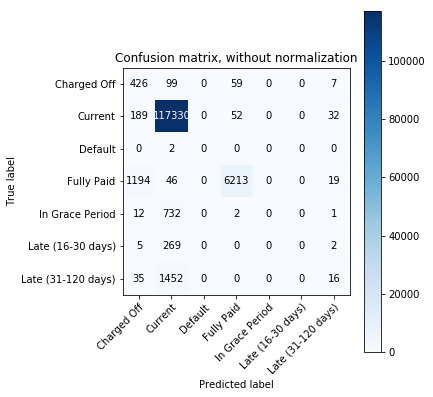

In [90]:
plot_confusion_matrix(data_target, pred2, 
                      title='Confusion matrix, without normalization',fig_name='confusion matrix LDA_svd.png')

In [ ]:
# ROC



In [84]:
from sklearn.preprocessing import label_binarize

target_ary = label_binarize(data_target, classes=['Charged Off','Current','Default','Fully Paid','In Grace Period','Late (16-30 days)','Late (31-120 days)'])

In [92]:
from sklearn.multiclass import OneVsRestClassifier

clf1 = OneVsRestClassifier(LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.2))
y_score = clf1.fit(x_pca, data_target).decision_function(x_pca)

In [93]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(target_ary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

<Figure size 432x288 with 0 Axes>

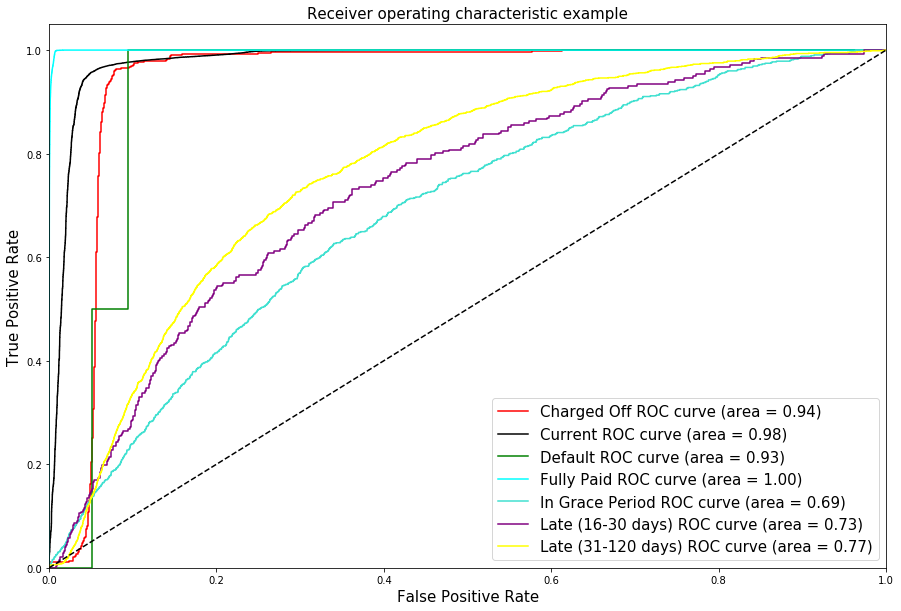

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = ['Charged Off','Current','Default','Fully Paid','In Grace Period','Late (16-30 days)','Late (31-120 days)']
plt.figure()
color=['red','black','green','cyan','turquoise','purple','yellow']
fig, ax=plt.subplots(figsize=(15,10))
for i in range(7):
    plt.plot(fpr[i], tpr[i], label= '{} ROC curve (area = %0.2f)'.format(labels[i]) % roc_auc[i],color=color[i])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Receiver operating characteristic example',fontsize=15)
plt.legend(loc="lower right",fontsize=15)

plt.show()
fig.savefig('LDA_lsqr ROC.png')